# TASK 2.4 (Model building using ML algorithms)
## Marketing for Financial Services

## Batch C Group 1

### Aman Kumar Singh

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import statsmodels.api as sm

### Import the DataFrame obtained after performing the pre-processing(EDA)

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(1)

,Unnamed: 0,age,marital,Region_Code,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,0,56,1,2,1,307,1,0,1,93.994,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head(1)

,age,marital,Region_Code,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,56,1,2,1,307,1,0,1,93.994,-36.4,...,0,0,0,0,0,1,0,0,0,0


In [6]:
x1 = df.iloc[:,0:-1]

In [7]:
x1.head(1)

,age,marital,Region_Code,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,1,2,1,307,1,0,1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0


In [8]:
x = pd.DataFrame(x1, columns=x1.columns)

In [9]:
y = df['y_yes']

In [10]:
# Baseline Accuracy
32876/(32876+4208)

0.8865278826448064

### Splitting the dataset into the Training set and Test set


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Data Scaling Using Z-Score Normalisation

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
y_train.value_counts()

0    23057
1     2901
Name: y_yes, dtype: int64

In [14]:
y_test.value_counts()

0    9819
1    1307
Name: y_yes, dtype: int64

#### To check whether the  data follow the same base line accuracy or not


In [15]:
23057/(2901+23057)

0.8882425456506665

In [16]:
9819/(1307+9819)

0.8825274132662233

## Q1)	Build appropriate ML model/s on the data.

### a) Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [18]:
lr = LogisticRegression()
lr

LogisticRegression()

In [19]:
l1 = lr.fit(x_train,y_train)

### The right metric to evaluate the performance of the logistic regression.

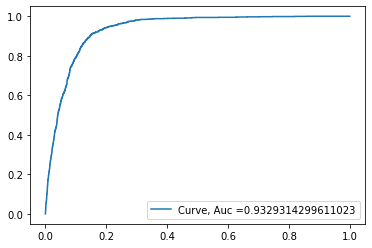

In [20]:
y_pred = l1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of logistic regression.

For Test data
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9819
           1       0.65      0.37      0.47      1307

    accuracy                           0.90     11126
   macro avg       0.78      0.67      0.71     11126
weighted avg       0.89      0.90      0.89     11126

For Train data
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23057
           1       0.67      0.40      0.50      2901

    accuracy                           0.91     25958
   macro avg       0.80      0.69      0.73     25958
weighted avg       0.90      0.91      0.90     25958



<AxesSubplot:>

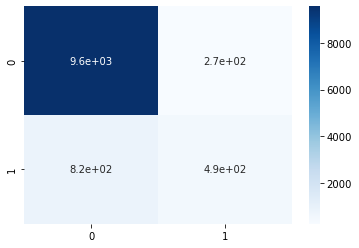

In [21]:
pred_res_lg = l1.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_lg))
pred_res_train = l1.predict(x_train)
print("For Train data")
print(classification_report(y_train,pred_res_train))
p=confusion_matrix(y_test,pred_res_lg)
sns.heatmap(p,annot=True,cmap='Blues')

### Appropriate hyper-parameter tuning for logistic regression

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=5)
best_model = clf.fit(x_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(x_test,y_test))

LogisticRegression(C=0.02811768697974228, random_state=0)
The mean accuracy of the model is: 0.9028401941398526


#### Accuracy remains the same even after hyper-parameter tuning

### b) Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
d1 = DecisionTreeClassifier()
d2 = d1.fit(x_train,y_train)

### The right metric to evaluate the performance of the decision tree.

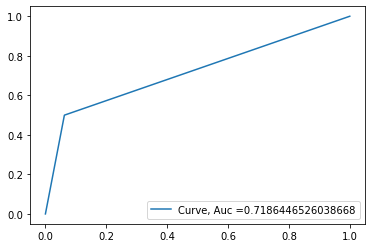

In [24]:
y_pred = d2.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

##### As 'AUC' is very less means this model is not good and there is no need of further evaluation hence we are opting for hyper-parameter tuning

## Appropriate hyper-parameter tuning for decision tree

### i) Making model using Decision tree by taking random value fo the parameters

In [25]:
dtree = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5, min_samples_leaf=5)
model_tree = dtree.fit(x_train,y_train)

### The right metric to evaluate the performance of the decision tree.

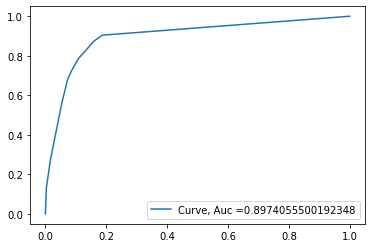

In [26]:
y_pred = model_tree.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of decision tree.

For Test data
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9819
           1       0.69      0.27      0.39      1307

    accuracy                           0.90     11126
   macro avg       0.80      0.63      0.67     11126
weighted avg       0.88      0.90      0.88     11126

For Train data
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     23057
           1       0.74      0.30      0.43      2901

    accuracy                           0.91     25958
   macro avg       0.83      0.64      0.69     25958
weighted avg       0.90      0.91      0.89     25958



<AxesSubplot:>

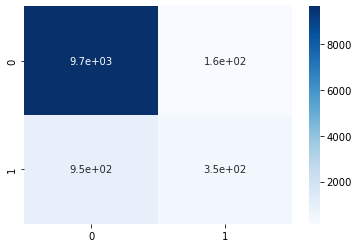

In [27]:
pred_res_test = model_tree.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_test))
pred_res_train = model_tree.predict(x_train)
print("For Train data")
print(classification_report(y_train,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

### ii) Pruning using GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [29]:
params = {'max_depth' : [2,4,6,8,10],
         'max_leaf_nodes' : [5,8,10,12],
         'min_samples_leaf' : [1,2,3,4]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_leaf_nodes': [5, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4]})

In [30]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12)

In [31]:
new_model = gcv.best_estimator_
new_model.fit(x_train,y_train)
y_train_pred = new_model.predict(x_train)
y_test_pred = new_model.predict(x_test)

### The right metric to evaluate the performance.

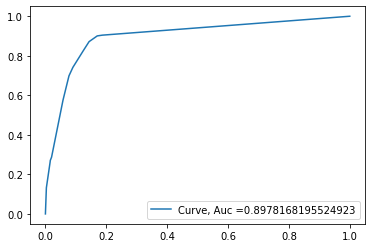

In [32]:
y_pred = new_model.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of decision tree.

For Test data
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9819
           1       0.69      0.27      0.39      1307

    accuracy                           0.90     11126
   macro avg       0.80      0.63      0.67     11126
weighted avg       0.88      0.90      0.88     11126

For Train data
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     23057
           1       0.74      0.30      0.43      2901

    accuracy                           0.91     25958
   macro avg       0.83      0.64      0.69     25958
weighted avg       0.90      0.91      0.89     25958



<AxesSubplot:>

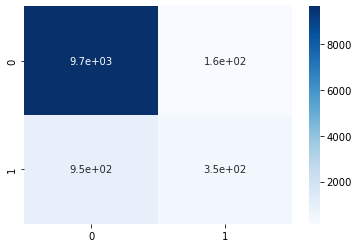

In [33]:
pred_res_test = new_model.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_test))
print("For Train data")
pred_res_train = new_model.predict(x_train)
print(classification_report(y_train,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

## c) Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120)
rf1 = rf.fit(x_train,y_train)

### The right metric to evaluate the performance of the random forest.

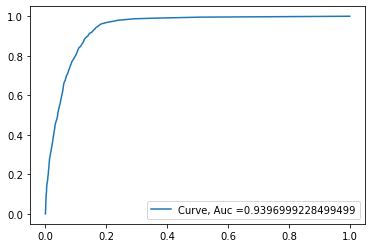

In [35]:
y_pred = rf1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of random forest.

For Test data
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9819
           1       0.65      0.45      0.53      1307

    accuracy                           0.91     11126
   macro avg       0.79      0.71      0.74     11126
weighted avg       0.90      0.91      0.90     11126

For Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23057
           1       1.00      1.00      1.00      2901

    accuracy                           1.00     25958
   macro avg       1.00      1.00      1.00     25958
weighted avg       1.00      1.00      1.00     25958



<AxesSubplot:>

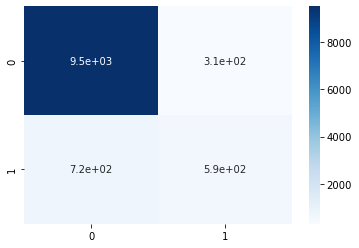

In [36]:
pred_res_test = rf1.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_test))
pred_res_train = rf1.predict(x_train)
print("For Train data")
print(classification_report(y_train,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

## Appropriate hyper-parameter tuning for Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators=8,min_samples_leaf=4,min_samples_split=9,criterion='entropy',max_features=4)
rf1 = rf.fit(x_train,y_train)

### The right metric to evaluate the performance of the random forest.

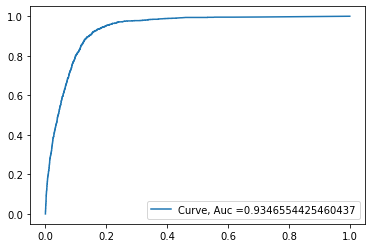

In [38]:
y_pred = rf1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of random forest.

For Test data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9819
           1       0.67      0.36      0.46      1307

    accuracy                           0.90     11126
   macro avg       0.80      0.67      0.71     11126
weighted avg       0.89      0.90      0.89     11126

For Train data
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     23057
           1       0.83      0.53      0.65      2901

    accuracy                           0.94     25958
   macro avg       0.89      0.76      0.81     25958
weighted avg       0.93      0.94      0.93     25958



<AxesSubplot:>

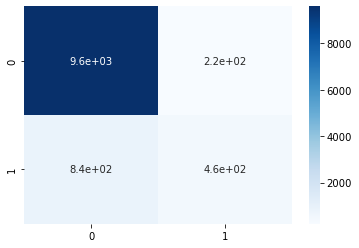

In [39]:
pred_res_test = rf1.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_test))
pred_res_train = rf1.predict(x_train)
print("For Train data")
print(classification_report(y_train,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

## d) XG Boost

In [40]:
import xgboost
#train XGBoost model
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(x_train, y_train.squeeze().values)

[18:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.08, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)

### The right metric to evaluate the performance of the XGBoost.

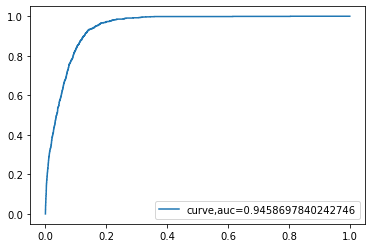

In [41]:
y_test_preds=xgb.predict_proba(x_test)[:,1]
fpr,tpr,a=metrics.roc_curve(y_test,y_test_preds)
auc=metrics.roc_auc_score(y_test,y_test_preds)
plt.plot(fpr,tpr,label="curve,auc="+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of XGBoost.

For Test data
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9819
           1       0.64      0.50      0.56      1307

    accuracy                           0.91     11126
   macro avg       0.79      0.73      0.76     11126
weighted avg       0.90      0.91      0.90     11126

For Train data
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23057
           1       0.83      0.68      0.74      2901

    accuracy                           0.95     25958
   macro avg       0.89      0.83      0.86     25958
weighted avg       0.95      0.95      0.95     25958



<AxesSubplot:>

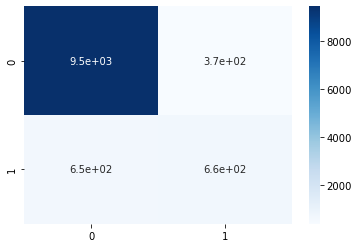

In [42]:
y_test_preds = xgb.predict(x_test)
print("For Test data")
print(classification_report(y_test,y_test_preds))
y_train_preds = xgb.predict(x_train)
print("For Train data")
print(classification_report(y_train,y_train_preds))
p=confusion_matrix(y_test,y_test_preds)
sns.heatmap(p,annot=True,cmap='Blues')

## Evaluation of algorithms 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [44]:
models = []
models.append(("XGB", XGBClassifier()))
models.append(("LR", LogisticRegression()))
models.append(("Tree", DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10)))
models.append(("RF", RandomForestClassifier()))

In [45]:
from sklearn.model_selection import KFold

In [46]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(model, x_train,y_train,cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    
    outcome = "%s: %f (%f)" % (name,cv_results.mean()*100, cv_results.std()*100)
    print(outcome)

[18:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 91.131802 (0.504454)
LR: 90.946894 (0.375265)
Tree: 90.788949 (0.

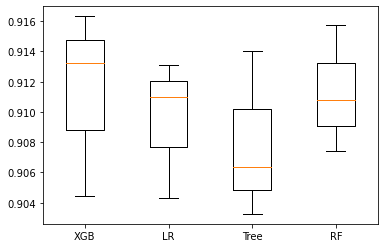

In [47]:
fig = plt.figure()
axis = fig.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()

### Q5) Identify issues and concerns on the given data and suggest the best technique/s to overcome the issues.

In [48]:
#!pip install imbalanced-learn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
y.value_counts()

0    32876
1     4208
Name: y_yes, dtype: int64

##### Our target column suffers from class imbalance hence we are doing SMOTING

In [51]:
smote = SMOTE(sampling_strategy='auto',random_state=12)
x_resam,y_resam = smote.fit_resample(x_train,y_train)

In [52]:
y_resam.value_counts()

0    23057
1    23057
Name: y_yes, dtype: int64

In [53]:
x_resam.shape

(46114, 40)

### Logistic Regression

In [54]:
lr = LogisticRegression()
l1 = lr.fit(x_resam,y_resam)

### The right metric to evaluate the performance

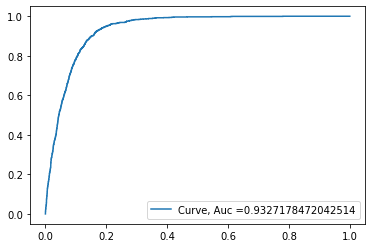

In [55]:
y_pred = l1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of logistic regression

For Test data
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      9819
           1       0.45      0.89      0.60      1307

    accuracy                           0.86     11126
   macro avg       0.72      0.87      0.76     11126
weighted avg       0.92      0.86      0.88     11126

For Train data
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     23057
           1       0.86      0.92      0.89     23057

    accuracy                           0.89     46114
   macro avg       0.89      0.89      0.89     46114
weighted avg       0.89      0.89      0.89     46114



<AxesSubplot:>

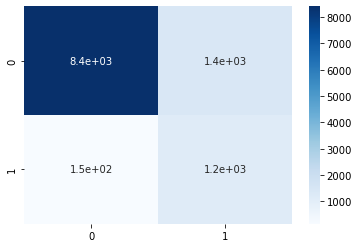

In [56]:
pred_res_lg = l1.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_lg))
pred_res_train = l1.predict(x_resam)
print("For Train data")
print(classification_report(y_resam,pred_res_train))
p=confusion_matrix(y_test,pred_res_lg)
sns.heatmap(p,annot=True,cmap='Blues')

### Decision Tree

In [57]:
d1 = DecisionTreeClassifier()
d2 = d1.fit(x_resam,y_resam)

### The right metric to evaluate the performance

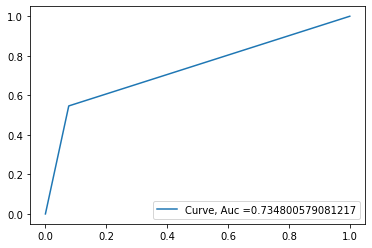

In [58]:
y_pred = d2.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

##### As 'AUC' is very less means this model is not good hence there is no need of further evaluation


### Decision Tree with random values of parameters

In [59]:
dtree = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5, min_samples_leaf=5)
model_tree = dtree.fit(x_resam,y_resam)

### The right metric to evaluate the performance

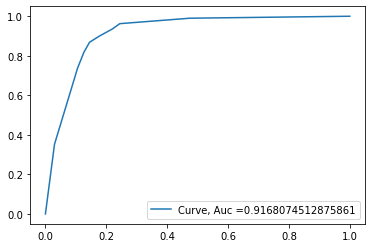

In [60]:
y_pred = model_tree.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of decision tree.

For Test data
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9819
           1       0.44      0.87      0.59      1307

    accuracy                           0.86     11126
   macro avg       0.71      0.86      0.75     11126
weighted avg       0.92      0.86      0.87     11126

For Train data
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     23057
           1       0.86      0.91      0.89     23057

    accuracy                           0.88     46114
   macro avg       0.89      0.88      0.88     46114
weighted avg       0.89      0.88      0.88     46114



<AxesSubplot:>

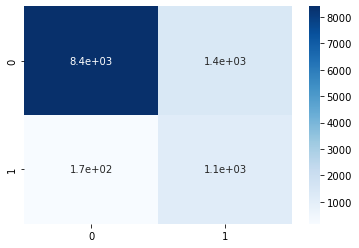

In [61]:
pred_res_test = model_tree.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_test))
pred_res_train = model_tree.predict(x_resam)
print("For Train data")
print(classification_report(y_resam,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

### Decision Tree using 'gridsearch'

In [62]:
params = {'max_depth' : [2,4,6,8,10],
         'max_leaf_nodes' : [5,10],
         'min_samples_leaf' : [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_resam,y_resam)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [1, 2]})

In [63]:
new_model = gcv.best_estimator_
new_model.fit(x_resam,y_resam)
y_train_pred = new_model.predict(x_resam)
y_test_pred = new_model.predict(x_test)

### The right metric to evaluate the performance

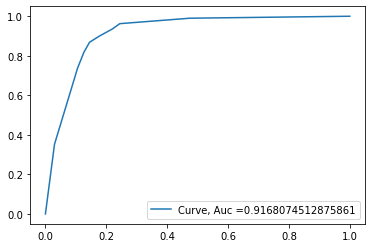

In [64]:
y_pred = new_model.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of decision tree using grid search

For Test data
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9819
           1       0.44      0.87      0.59      1307

    accuracy                           0.86     11126
   macro avg       0.71      0.86      0.75     11126
weighted avg       0.92      0.86      0.87     11126

For Train data
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     23057
           1       0.86      0.91      0.89     23057

    accuracy                           0.88     46114
   macro avg       0.89      0.88      0.88     46114
weighted avg       0.89      0.88      0.88     46114



<AxesSubplot:>

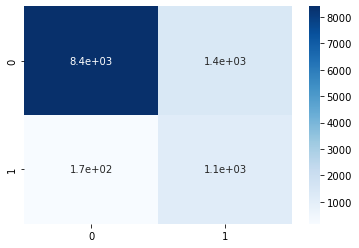

In [65]:
pred_res_test = new_model.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_test))
print("For Train data")
pred_res_train = new_model.predict(x_resam)
print(classification_report(y_resam,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

### c) Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120)
rf1 = rf.fit(x_resam,y_resam)

### The right metric to evaluate the performance.

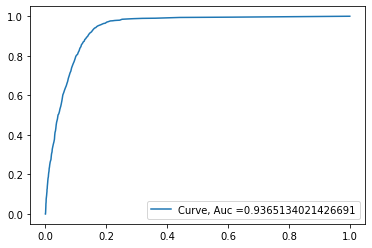

In [67]:
y_pred = rf1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of random forest.

For Test data
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9819
           1       0.58      0.58      0.58      1307

    accuracy                           0.90     11126
   macro avg       0.76      0.76      0.76     11126
weighted avg       0.90      0.90      0.90     11126

For Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23057
           1       1.00      1.00      1.00     23057

    accuracy                           1.00     46114
   macro avg       1.00      1.00      1.00     46114
weighted avg       1.00      1.00      1.00     46114



<AxesSubplot:>

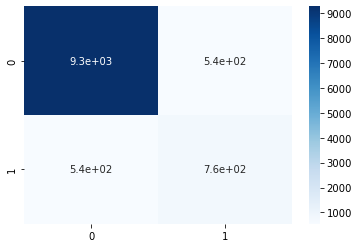

In [68]:
pred_res_test = rf1.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_test))
pred_res_train = rf1.predict(x_resam)
print("For Train data")
print(classification_report(y_resam,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

#### Model suffer from over-fitting hence we are going for hyper-parameter tuning

### Appropriate hyper-parameter tuning for Random Forest

In [69]:
rf = RandomForestClassifier(n_estimators=8,min_samples_leaf=4,min_samples_split=9,criterion='entropy',max_features=4)
rf1 = rf.fit(x_resam,y_resam)

### The right metric to evaluate the performance.

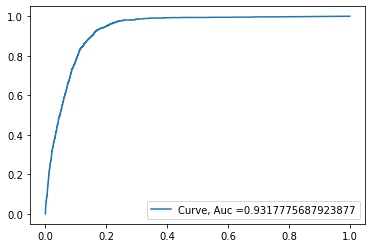

In [70]:
y_pred = rf1.predict_proba(x_test)[:,1]
fpr,tpr,a = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'Curve, Auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of random forest with hyper-parameter tuning

For Test data
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      9819
           1       0.53      0.71      0.61      1307

    accuracy                           0.89     11126
   macro avg       0.74      0.81      0.77     11126
weighted avg       0.91      0.89      0.90     11126

For Train data
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     23057
           1       0.95      0.98      0.96     23057

    accuracy                           0.96     46114
   macro avg       0.96      0.96      0.96     46114
weighted avg       0.96      0.96      0.96     46114



<AxesSubplot:>

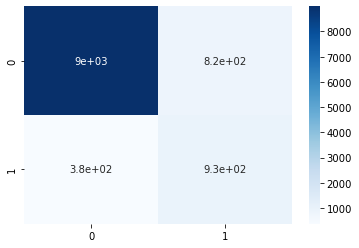

In [71]:
pred_res_test = rf1.predict(x_test)
print("For Test data")
print(classification_report(y_test,pred_res_test))
pred_res_train = rf1.predict(x_resam)
print("For Train data")
print(classification_report(y_resam,pred_res_train))
p=confusion_matrix(y_test,pred_res_test)
sns.heatmap(p,annot=True,cmap='Blues')

## d) XG Boost

In [72]:
import xgboost
#train XGBoost model
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(x_resam, y_resam.squeeze().values)

[18:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.08, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)

### The right metric to evaluate the performance of the XGBoost.

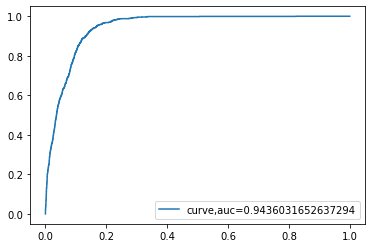

In [73]:
y_test_preds=xgb.predict_proba(x_test)[:,1]
fpr,tpr,a=metrics.roc_curve(y_test,y_test_preds)
auc=metrics.roc_auc_score(y_test,y_test_preds)
plt.plot(fpr,tpr,label="curve,auc="+str(auc))
plt.legend(loc=4)
plt.show()

### As AUROC is good enough hence we are evaluating the performance of model

### Evaluate the performance of XG-Boost

For Test data
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9819
           1       0.61      0.59      0.60      1307

    accuracy                           0.91     11126
   macro avg       0.78      0.77      0.77     11126
weighted avg       0.91      0.91      0.91     11126

For Train data
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23057
           1       0.97      0.97      0.97     23057

    accuracy                           0.97     46114
   macro avg       0.97      0.97      0.97     46114
weighted avg       0.97      0.97      0.97     46114



<AxesSubplot:>

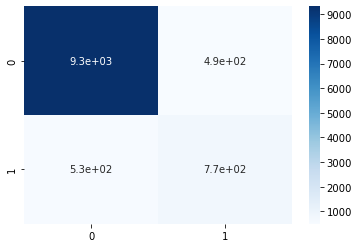

In [74]:
y_test_preds = xgb.predict(x_test)
print("For Test data")
print(classification_report(y_test,y_test_preds))
y_train_preds = xgb.predict(x_resam)
print("For Train data")
print(classification_report(y_resam,y_train_preds))
p=confusion_matrix(y_test,y_test_preds)
sns.heatmap(p,annot=True,cmap='Blues')

## Evaluation of algorithms after SMOTE

In [75]:
models = []
models.append(("XGB", XGBClassifier()))
models.append(("LR", LogisticRegression()))
models.append(("Tree", DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10)))
models.append(("RF", RandomForestClassifier()))

In [76]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(model, x_resam,y_resam,cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    
    outcome = "%s: %f (%f)" % (name,cv_results.mean()*100, cv_results.std()*100)
    print(outcome)

[18:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 94.897508 (3.577947)
LR: 81.432955 (5.312675)
Tree: 82.009946 (5.

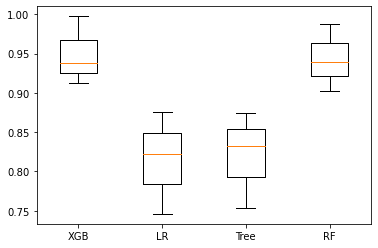

In [77]:
fig = plt.figure()
axis = fig.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()

## Among all the models which we made Decision Tree is best model as it is giving us best accuracy also the difference between the accuracy for train and test data is minimum.

### Team members:
##### Aman kumar singh, Shagufta Anjum Azad, Anwesha Patnaik, Sirla Bapuji and Sidhi Agarwal